# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import explained_variance_score
from sklearn.tree import DecisionTreeClassifier

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [ ]:
dataset = pd.read_csv("/content/data_load.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
dataset.shape

(1854, 11)

In [ ]:
#Normalización de datos
scaler = RobustScaler().fit(X_test)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?



### Respuestas ejercicio 1
1. El conjunto de datos contiene informacion de referencia y de rendimiento de prestamos hipotecarios para 1854 casos. 

2. El TARGET es una variable binaria que indica si un solicitante finalmente incumplió con el pago o no. Los atributos son 11. 

3. Los atributos disponibles son los siguientes: 

- TARGET: 1 = cliente incumplió con el pago - 0 = préstamo reembolsado
- LOAN: Monto de la solicitud de préstamo
- MORTDUE: Monto adeudado de la hipoteca existente
- VALUE: Valor de la propiedad actual
- YOJ: Años en el trabajo actual
- DEROG: Número de informes despectivos importantes
- DELINQ: Número de líneas de crédito morosas
- CLAGE: Antigüedad de la línea comercial más antigua (en meses)
- NINQ: Número de líneas de crédito recientes
- CLNO: Número de líneas de crédito
- DEBTINC: Relación deuda-ingresos

4. Los atributos que creemos son más determinantes para la predicción son los siguientes: 

- LOAN
- YOJ
- DEROG 
- DELINQ
- NINQ
- DEBTINC

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [ ]:
model = SGDClassifier(random_state=0) #SGD : descenso del gradiente estocastico , #el valor 0 para random... implica que a partir de ese entero
# se determina la nueva semilla aleatoria. 

#Entrenamos el modelo con los datos del conjunto de training

model.fit(X_train, y_train) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#Hacemos predicciones sobre el conjunto de training y de test haciendo uso del modelo entrenado. 

y_predict_test = model.predict(X_test)

y_predict_train = model.predict(X_train)

In [ ]:
names = ['Cliente Pagador', 'Cliente Deudor']

print('Reporte de clasificacion del conjunto de test: ')
print('')
print(classification_report(y_test, y_predict_test, target_names=names))
print('Reporte de clasificacion del conjunto de training: ')
print('')
print(classification_report(y_train, y_predict_train, target_names=names))

Reporte de clasificacion del conjunto de test: 

                 precision    recall  f1-score   support

Cliente Pagador       0.86      1.00      0.93       313
 Cliente Deudor       0.90      0.16      0.26        58

       accuracy                           0.87       371
      macro avg       0.88      0.58      0.60       371
   weighted avg       0.87      0.87      0.82       371

Reporte de clasificacion del conjunto de training: 

                 precision    recall  f1-score   support

Cliente Pagador       0.86      0.99      0.92      1232
 Cliente Deudor       0.76      0.23      0.35       251

       accuracy                           0.86      1483
      macro avg       0.81      0.61      0.64      1483
   weighted avg       0.85      0.86      0.82      1483



De las metricas observamos que de los 371 casos del conjunto de test, 313 son clientes pagadores y solo 58, deudores. Ahora bien, para la clase "Cliente Pagador" el modelo tiene una precision de 0.86. Esto signifca que el 86% de los clientes que supusimos pagadores realmente lo son. Además el modelo tiene una recall de 1, esto significa que identificamos el 100% de los pagadores. Luego, el valor de F1 es 0.93. 
En cuanto a la clase "Cliente Deudor", vemos que el modelo tiene una precision del 90%, esto significa que de los clientes que identificamos como deudores, el 90% lo era efectivamente. Ademas se identificaron el 16% de los deudores. Finalmente, F1 es 0.26. 
El modelo mide una accuracy del 87%. Sin embargo, esta metrica es engañosa si las clases están desbalanceadas, como en este caso donde tenemos solo 58 clientes deudores vs. 313 clientes pagadores. 


[[312   1]
 [ 49   9]]


Text(0.5, 1.0, 'Matriz de Confusion de Clasificador SGD por defecto')

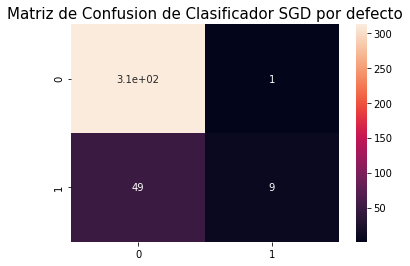

In [ ]:
print(confusion_matrix(y_test, y_predict_test))
sn.heatmap(confusion_matrix(y_test, y_predict_test),annot=True)
plt.title('Matriz de Confusion de Clasificador SGD por defecto',fontsize=15)
# By definition a confusion matrix C is such that C[i,j] is equal to the number of observations 
# known to be in group i and predicted to be in group j.
# Thus in binary classification, the count of true negatives is C[0,0], false negatives is C[1,0] , 
# true positives is C[1,1] and false positives is C[0,1].



De la matriz de confusion podemos ver que tenemos 312 TN (true negatives) y solo 9 TP (true positives). Es decir, identificamos 312 de los 313 pagadores pero solo 9 de los 58 deudores. Los FP son 1, un pagador que asumimos como deudor y los FN son 49, 49 clientes que asumimos como pagadores y resultaron deudores. Modelos mas optimos esperan mayores valores en la diagonal y valores pequeños a los lados. 

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Deseamos mejorar nuestro modelo. Para ello: comenzamos probando y listando las distintas combinaciones posibles ("a  mano") empleando 
ParameterGrid. 

In [ ]:
param_grid = {
    'loss': ['hinge', 'log', 'squared_epsilon_insensitive','squared_loss','modified_huber','perceptron'],
    'learning_rate': ['optimal'],
    'alpha': [0.1, 0.01, 0.001, 0.0001]
}
prev_accuracy_score = 0
for params in ParameterGrid(param_grid):
    model = SGDClassifier(**params, random_state=0)
    model.fit(X_train, y_train)
    y_predict_test = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict_test, normalize=True)
    variance = explained_variance_score(y_test, y_predict_test, multioutput='uniform_average')
    print()
    print('Classification Report: ')
    print(classification_report(y_test, y_predict_test))
    print('Params: ',params)
    print('Accuracy: ', accuracy,' Variance: ', variance)
    print()
    if accuracy > prev_accuracy_score:
      best_model = model
      prev_accuracy_score = accuracy
      best_params = params
      best_variance = variance
print('')
print('')
print('El mejor modelo es: ', best_model, 'Con una accuracy de: ', prev_accuracy_score, 'Sus parámetros son: ', best_params, 'Y su varianza es: ', best_variance)


Classification Report: 
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       313
           1       1.00      0.17      0.29        58

    accuracy                           0.87       371
   macro avg       0.93      0.59      0.61       371
weighted avg       0.89      0.87      0.83       371

Params:  {'alpha': 0.1, 'learning_rate': 'optimal', 'loss': 'hinge'}
Accuracy:  0.8706199460916442  Variance:  0.14597333920898958


Classification Report: 
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       313
           1       1.00      0.19      0.32        58

    accuracy                           0.87       371
   macro avg       0.93      0.59      0.62       371
weighted avg       0.89      0.87      0.83       371

Params:  {'alpha': 0.1, 'learning_rate': 'optimal', 'loss': 'log'}
Accuracy:  0.8733153638814016  Variance:  0.16117660019830327


Classification Report: 
         

De acuerdo con esto el "mejor modelo" es el GDClassifier con parametros: {'alpha': 0.001, 'learning_rate': 'optimal', 'loss': 'hinge'} . Logra una accuracy de 0.889487870619946 y una varianza de:  0.25470970584995034. Veamos si mejora la matriz de confusion. 

In [ ]:
best_model

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Reporte de clasificacion del conjunto de test: 

                 precision    recall  f1-score   support

Cliente Pagador       0.88      1.00      0.94       313
 Cliente Deudor       1.00      0.29      0.45        58

       accuracy                           0.89       371
      macro avg       0.94      0.65      0.70       371
   weighted avg       0.90      0.89      0.86       371

Reporte de clasificacion del conjunto de training: 

                 precision    recall  f1-score   support

Cliente Pagador       0.87      1.00      0.93      1232
 Cliente Deudor       0.92      0.27      0.42       251

       accuracy                           0.87      1483
      macro avg       0.90      0.64      0.68      1483
   weighted avg       0.88      0.87      0.84      1483

[[313   0]
 [ 41  17]]


Text(0.5, 1.0, 'Matriz de Confusion de Clasificador SGD con ParameterGrid')

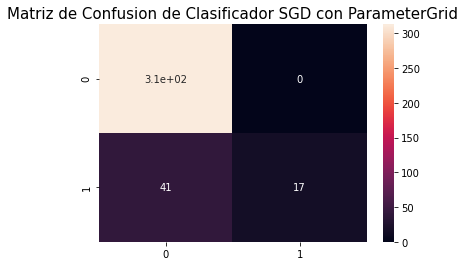

In [ ]:
#si entrenamos con este best model que nos queda?

y_predict_train = best_model.predict(X_train)
y_predict_test = best_model.predict(X_test)


print('Reporte de clasificacion del conjunto de test: ')
print('')
print(classification_report(y_test, y_predict_test, target_names=names))
print('Reporte de clasificacion del conjunto de training: ')
print('')
print(classification_report(y_train, y_predict_train, target_names=names))

print(confusion_matrix(y_test, y_predict_test))
#print(confusion_matrix(y_train, y_predict_train))

sn.heatmap(confusion_matrix(y_test, y_predict_test),annot=True)
plt.title('Matriz de Confusion de Clasificador SGD con ParameterGrid',fontsize=15)

Bueno, acá observamos mejoras en la matriz de confusion, lo cual ya se intuia de los valores de las metricas. Por un lado, vemos que los True Positives son 313, es decir, el modelo predijo correctamente los 313 clientes pagadores. Tmb mejoró el valor de los TN, el modelo predijo 17 deudores (antes habiamos predicho solo 9). No hubo FP y si bien disminuyó el numero de FN, ahora son 41 y antes 49, sigue siendo elevado el numero de clientes morosos que no estamos prediciendo. 

Intentaremos mejorar aun mas el modelo. Para ello, podemos tambien emplear GridSearchCV para hacer validacion cruzada sobre una grilla de parametros (la grilla ya empleada anteriormente). Emplearemos como scoring la accuracy para evaluar la performance de cada modelo y cv=5. 


In [ ]:
model = SGDClassifier(random_state=0)

best_model_cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
#xq usar accuracy como scoring si sabemos que no estan balanceadas las clases?
# y xq si usamos "recall_weighted", la cosa da fea igual?
best_model_cv.fit(X_train, y_train)

y_predict_train = best_model_cv.predict(X_train)
y_predict_test = best_model_cv.predict(X_test)

print('Reporte de clasificacion del conjunto de test: ')
print('')
print(classification_report(y_test, y_predict_test, target_names=names))
print('Reporte de clasificacion del conjunto de training: ')
print('')
print(classification_report(y_train, y_predict_train, target_names=names))


Reporte de clasificacion del conjunto de test: 

                 precision    recall  f1-score   support

Cliente Pagador       0.88      0.98      0.93       313
 Cliente Deudor       0.74      0.24      0.36        58

       accuracy                           0.87       371
      macro avg       0.81      0.61      0.64       371
   weighted avg       0.85      0.87      0.84       371

Reporte de clasificacion del conjunto de training: 

                 precision    recall  f1-score   support

Cliente Pagador       0.87      0.99      0.93      1232
 Cliente Deudor       0.85      0.29      0.44       251

       accuracy                           0.87      1483
      macro avg       0.86      0.64      0.68      1483
   weighted avg       0.87      0.87      0.84      1483



[[308   5]
 [ 44  14]]


Text(0.5, 1.0, 'Matriz de Confusion de Clasificador SGD con Cross-Validation')

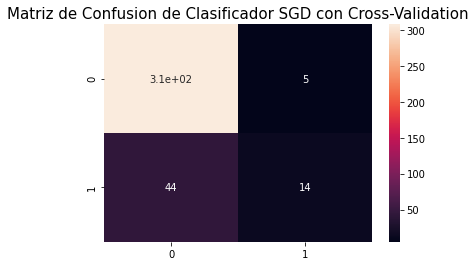

In [ ]:
print(confusion_matrix(y_test, y_predict_test))
#print(confusion_matrix(y_train, y_predict_train))

sn.heatmap(confusion_matrix(y_test, y_predict_test),annot=True)
plt.title('Matriz de Confusion de Clasificador SGD con Cross-Validation',fontsize=15)

Bueno, vemos que la situacion empeoró aunque no sabemos si eso debia ocurrir. TN que antes se predecian bien pasaron a ser FP, el numero de FN (lo mas grave: predecir que un cliente va a pagar cuando no) aumentó y disminuyo el numero de TP.
Qué pasa entonces si en vez de usar la accuracy como scoring, usamos recall????


Reporte de clasificacion del conjunto de test: 

                 precision    recall  f1-score   support

Cliente Pagador       0.83      0.66      0.74       313
 Cliente Deudor       0.14      0.29      0.19        58

       accuracy                           0.60       371
      macro avg       0.49      0.48      0.46       371
   weighted avg       0.73      0.60      0.65       371

Reporte de clasificacion del conjunto de training: 

                 precision    recall  f1-score   support

Cliente Pagador       0.84      0.64      0.73      1232
 Cliente Deudor       0.18      0.38      0.24       251

       accuracy                           0.60      1483
      macro avg       0.51      0.51      0.49      1483
   weighted avg       0.72      0.60      0.64      1483

[[206 107]
 [ 41  17]]


Text(0.5, 1.0, 'Matriz de Confusion de Clasificador SGD con CV and recall')

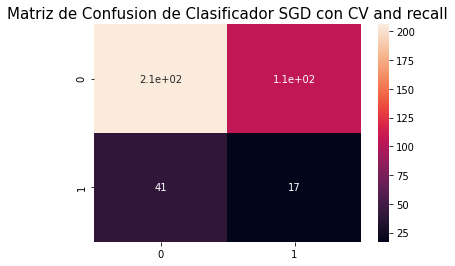

In [ ]:
model = SGDClassifier(random_state=0)

best_model_cv = GridSearchCV(model, param_grid, scoring='recall', cv=5)
#xq usar accuracy como scoring si sabemos que no estan balanceadas las clases?
# y xq si usamos "recall_weighted", la cosa da fea igual?
best_model_cv.fit(X_train, y_train)

y_predict_train = best_model_cv.predict(X_train)
y_predict_test = best_model_cv.predict(X_test)

print('Reporte de clasificacion del conjunto de test: ')
print('')
print(classification_report(y_test, y_predict_test, target_names=names))
print('Reporte de clasificacion del conjunto de training: ')
print('')
print(classification_report(y_train, y_predict_train, target_names=names))

print(confusion_matrix(y_test, y_predict_test))
#print(confusion_matrix(y_train, y_predict_train))

sn.heatmap(confusion_matrix(y_test, y_predict_test),annot=True)
plt.title('Matriz de Confusion de Clasificador SGD con CV and recall',fontsize=15)


Mejora la recall relacionada con la clase cliente deudor pero empeora considerablemente la situacion con la clase cliente pagador. 

A continuacion haremos lo mismo que antes solo que usaremos como clasificador, un arbol de decision. 

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Reporte de clasificacion del conjunto de test: 

                 precision    recall  f1-score   support

Cliente Pagador       0.93      0.93      0.93       313
 Cliente Deudor       0.62      0.64      0.63        58

       accuracy                           0.88       371
      macro avg       0.77      0.78      0.78       371
   weighted avg       0.88      0.88      0.88       371

Reporte de clasificacion del conjunto de training: 

                 precision    recall  f1-score   support

Cliente Pagador       1.00      1.00      1.00      1232
 Cliente Deudor       1.00      1.00      1.00       251

       accuracy                           1.00      1483
      macro avg       1.00      1.00      1.00      1483
   weighted avg       1.00      1.00      1.00      1483

[[290  23]
 [ 21  37]]


Text(0.5, 1.0, 'Matriz de Confusion de Clasificador Decision Tree por defecto')

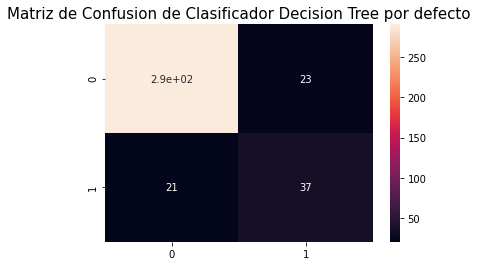

In [ ]:
y_predict_train = clf.predict(X_train)
y_predict_test = clf.predict(X_test)

print('Reporte de clasificacion del conjunto de test: ')
print('')
print(classification_report(y_test, y_predict_test, target_names=names))
print('Reporte de clasificacion del conjunto de training: ')
print('')
print(classification_report(y_train, y_predict_train, target_names=names))

print(confusion_matrix(y_test, y_predict_test))
sn.heatmap(confusion_matrix(y_test, y_predict_test),annot=True)
plt.title('Matriz de Confusion de Clasificador Decision Tree por defecto',fontsize=15)

Bueno, vemos que haciendo uso del clasificador con los valores por defecto, obtenemos un modelo con una accuracy del 88%. Lo más importante, la recall para la clase cliente deudor ha aumentado mucho. 
Esto significa que el modelo es capaz de predecir a los clientes deudores mucho mejor. Ahora se predicen 37 de los 58 clientes morosos. Han disminuido los FN a 21, lo cual es muy bueno y si bien tenemos mas FP que antes se predecian correctamente como TN, no es un error tan grave. 

Veamos si ajustando los hiperparametros, mejora la cosa. 

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
param_grid = {
    'criterion': ['entropy','gini'],
    'max_depth': [None,2,5,10,50,100],
    'min_samples_split' : [2,3,8,19]
}

prev_accuracy_score = 0
for params in ParameterGrid(param_grid):
    model = DecisionTreeClassifier(**params, random_state=0)
    model.fit(X_train, y_train)
    y_predict_test = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict_test, normalize=True)
    variance = explained_variance_score(y_test, y_predict_test, multioutput='uniform_average')
    print()
    print('Classification Report: ')
    print(classification_report(y_test, y_predict_test))
    print('Params: ',params)
    print('Accuracy: ', accuracy,' Variance: ', variance)
    print()
    if accuracy > prev_accuracy_score:
      best_model = model
      prev_accuracy_score = accuracy
      best_params = params
      best_variance = variance

print(best_model, prev_accuracy_score, best_params, best_variance)


Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       313
           1       0.66      0.66      0.66        58

    accuracy                           0.89       371
   macro avg       0.80      0.80      0.80       371
weighted avg       0.89      0.89      0.89       371

Params:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Accuracy:  0.8921832884097035  Variance:  0.1825493004296571


Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       313
           1       0.62      0.64      0.63        58

    accuracy                           0.88       371
   macro avg       0.77      0.78      0.78       371
weighted avg       0.88      0.88      0.88       371

Params:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 3}
Accuracy:  0.8814016172506739  Variance:  0.10102456758840983


Classification R

Luego, el modelo que mejor clasifica tiene una accuracy de 0.9029649595687331, sus parametros son:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 3} y tiene una varianza de 0.2783959457970693. Si entrenamos con este modelo, nos queda:

Reporte de clasificacion del conjunto de test: 

                 precision    recall  f1-score   support

Cliente Pagador       0.92      0.97      0.94       313
 Cliente Deudor       0.76      0.55      0.64        58

       accuracy                           0.90       371
      macro avg       0.84      0.76      0.79       371
   weighted avg       0.90      0.90      0.90       371

Reporte de clasificacion del conjunto de training: 

                 precision    recall  f1-score   support

Cliente Pagador       0.95      1.00      0.97      1232
 Cliente Deudor       0.99      0.74      0.84       251

       accuracy                           0.95      1483
      macro avg       0.97      0.87      0.91      1483
   weighted avg       0.96      0.95      0.95      1483

[[303  10]
 [ 26  32]]


Text(0.5, 1.0, 'Matriz de Confusion de Clasificador Decision Tree c/ ParameterGrid')

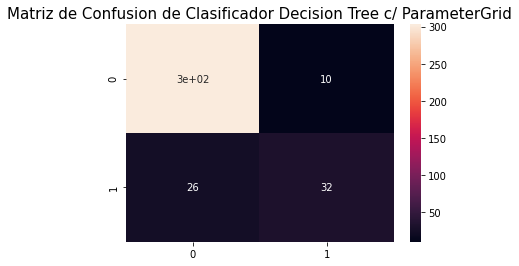

In [ ]:
y_predict_train = best_model.predict(X_train)
y_predict_test = best_model.predict(X_test)

print('Reporte de clasificacion del conjunto de test: ')
print('')
print(classification_report(y_test, y_predict_test, target_names=names))
print('Reporte de clasificacion del conjunto de training: ')
print('')
print(classification_report(y_train, y_predict_train, target_names=names))

print(confusion_matrix(y_test, y_predict_test))
#print(confusion_matrix(y_train, y_predict_train))

sn.heatmap(confusion_matrix(y_test, y_predict_test),annot=True)
plt.title('Matriz de Confusion de Clasificador Decision Tree c/ ParameterGrid',fontsize=15)

Vemos que si bien la accuracy ha mejorado xq se predicen mejor los TN, vemos que ha disminuido el valor de TP predichos asi como ha aumentado el numero de FP y FN. 
No creemos que el modelo haya mejorado. 
Notar que la eleccion de un mejor modelo esta basado en la accuracy que ya dijimos no era una buena metrica de comparacion en este caso. Pero si en vez de la accuracy, usamos como scoring "recall_weighted" por ej, obtenemos lo mismo, asi que no sabemos. 


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best') 0.9029649595687331 {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 3} 0.2783959457970693
Reporte de clasificacion del conjunto de test: 

                 precision    recall  f1-score   support

Cliente Pagador       0.92      0.97      0.94       313
 Cliente Deudor       0.76      0.55      0.64        58

       accuracy                           0.90       371
      macro avg       0.84      0.76      0.79       371
   weighted avg       0.90      0.90      0.90       371

Reporte de clasificacion del conjunto de training: 

                 precision    

Text(0.5, 1.0, 'Matriz de Confusion de Clasificador Decision Tree c/ ParameterGrid & recall')

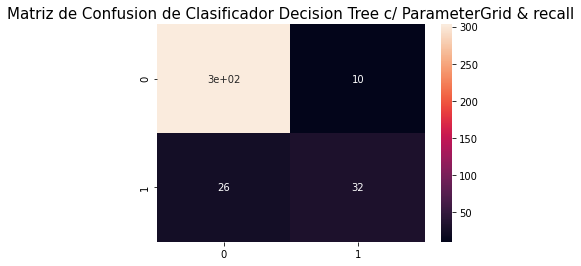

In [ ]:
param_grid = {
    'criterion': ['entropy','gini'],
    'max_depth': [None,2,5,10,50,100],
    'min_samples_split' : [2,3,8,19]
}

prev_accuracy_score = 0
for params in ParameterGrid(param_grid):
    model = DecisionTreeClassifier(**params, random_state=0)
    model.fit(X_train, y_train)
    y_predict_test = model.predict(X_test)
    accuracy = recall_score(y_test, y_predict_test, average='micro')
    variance = explained_variance_score(y_test, y_predict_test, multioutput='uniform_average')
#    print()
 #   print('Classification Report: ')
  #  print(classification_report(y_test, y_predict_test))
   # print('Params: ',params)
   # print('Accuracy: ', accuracy,' Variance: ', variance)
   # print()
    if accuracy > prev_accuracy_score:
      best_model = model
      prev_accuracy_score = accuracy
      best_params = params
      best_variance = variance

print(best_model, prev_accuracy_score, best_params, best_variance)

y_predict_train = best_model.predict(X_train)
y_predict_test = best_model.predict(X_test)

print('Reporte de clasificacion del conjunto de test: ')
print('')
print(classification_report(y_test, y_predict_test, target_names=names))
print('Reporte de clasificacion del conjunto de training: ')
print('')
print(classification_report(y_train, y_predict_train, target_names=names))

print(confusion_matrix(y_test, y_predict_test))
#print(confusion_matrix(y_train, y_predict_train))

sn.heatmap(confusion_matrix(y_test, y_predict_test),annot=True)
plt.title('Matriz de Confusion de Clasificador Decision Tree c/ ParameterGrid & recall',fontsize=15)

Ahora emplearemos nuevamente GridSearchCV para hacer validacion cruzada sobre una grilla de parametros (la grilla ya empleada anteriormente). Emplearemos como scoring la accuracy para evaluar la performance de cada modelo y cv=5. 


Reporte de clasificacion del conjunto de test: 

                 precision    recall  f1-score   support

Cliente Pagador       0.92      0.96      0.94       313
 Cliente Deudor       0.74      0.53      0.62        58

       accuracy                           0.90       371
      macro avg       0.83      0.75      0.78       371
   weighted avg       0.89      0.90      0.89       371

Reporte de clasificacion del conjunto de training: 

                 precision    recall  f1-score   support

Cliente Pagador       0.95      0.99      0.97      1232
 Cliente Deudor       0.95      0.73      0.83       251

       accuracy                           0.95      1483
      macro avg       0.95      0.86      0.90      1483
   weighted avg       0.95      0.95      0.95      1483

[[302  11]
 [ 27  31]]


Text(0.5, 1.0, 'Matriz de Confusion de Clasificador Decision Tree c/ CV')

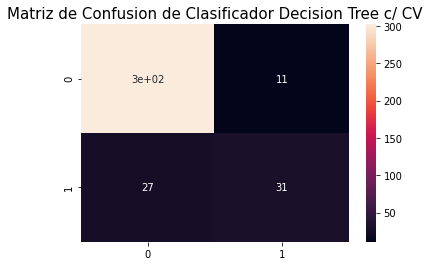

In [ ]:
model = DecisionTreeClassifier(random_state=0)
best_model = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
best_model.fit(X_train, y_train)

y_predict_test = best_model.predict(X_test)
y_predict_train = best_model.predict(X_train)

print('Reporte de clasificacion del conjunto de test: ')
print('')
print(classification_report(y_test, y_predict_test, target_names=names))
print('Reporte de clasificacion del conjunto de training: ')
print('')
print(classification_report(y_train, y_predict_train, target_names=names))

print(confusion_matrix(y_test, y_predict_test))
sn.heatmap(confusion_matrix(y_test, y_predict_test),annot=True)
plt.title('Matriz de Confusion de Clasificador Decision Tree c/ CV',fontsize=15)

No vemos mejoria con respecto a la ultima clasificacion. Veamos que ocurre si empleamos como scoring el recall:

Reporte de clasificacion del conjunto de test: 

                 precision    recall  f1-score   support

Cliente Pagador       0.94      0.94      0.94       313
 Cliente Deudor       0.66      0.66      0.66        58

       accuracy                           0.89       371
      macro avg       0.80      0.80      0.80       371
   weighted avg       0.89      0.89      0.89       371

Reporte de clasificacion del conjunto de training: 

                 precision    recall  f1-score   support

Cliente Pagador       1.00      1.00      1.00      1232
 Cliente Deudor       1.00      1.00      1.00       251

       accuracy                           1.00      1483
      macro avg       1.00      1.00      1.00      1483
   weighted avg       1.00      1.00      1.00      1483

[[293  20]
 [ 20  38]]


Text(0.5, 1.0, 'Matriz de Confusion de Clasificador Decision Tree c/ CV & recall')

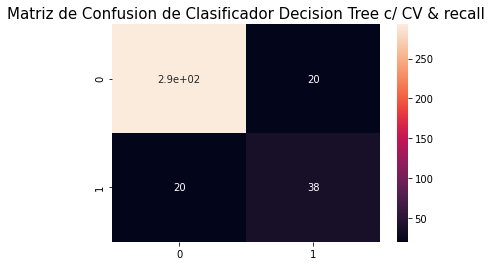

In [ ]:
best_model = GridSearchCV(model, param_grid, scoring='recall', cv=5)
best_model.fit(X_train, y_train)

y_predict_test = best_model.predict(X_test)
y_predict_train = best_model.predict(X_train)

print('Reporte de clasificacion del conjunto de test: ')
print('')
print(classification_report(y_test, y_predict_test, target_names=names))
print('Reporte de clasificacion del conjunto de training: ')
print('')
print(classification_report(y_train, y_predict_train, target_names=names))

print(confusion_matrix(y_test, y_predict_test))
sn.heatmap(confusion_matrix(y_test, y_predict_test),annot=True)
plt.title('Matriz de Confusion de Clasificador Decision Tree c/ CV & recall',fontsize=15)

Ahora si, vemos que si bien la accuracy bajó, el recall en la clase "cliente deudor" subió. Vemos que hemos optimizado el numero de TP y de FN, aunque han disminuido los TN y han aumentado los FN. 
De igual manera, es mejor clasificar incorrectamente un cliente pagador como moroso que asumir que un cliente moroso nos va a pagar. 